##### Metrics for Classification Sticth Fabric Detection
- Accuracy (Most Important)
- F1 Score 
- Precision
- Recall
- Time Complexity (Important)
- ROC AUC (Optional)
- Kappa (Optional)
- MCC (Optional)

### Calculation Metrics

- **Confusion Matrix**: Defined as TP (True Positive), FP (False Positive), FN (False Negative), TN (True Negative)

- **Accuracy**: `(TP + TN) / (TP + TN + FN + FP)`

- **Error Rate**: `(FP + FN) / (TP + TN + FN + FP)`

- **Sensitivity (Recall)**: `TP / (TP + FN)`

- **Specificity**: `TN / (TN + FP)`

- **Balanced Accuracy**: `(Sensitivity + Specificity) / 2`

- **Precision**: `TP / (TP + FP)`

- **F1-Score**: `2 * (Precision * Recall) / (Precision + Recall)`

- **Macro**: A type of averaging method for multiclass classification

- **Weighted**: A type of averaging method that takes class imbalance into account

- **ROC AUC**: Area Under the Receiver Operating Characteristic Curve

- **PR AUC**: Area Under the Precision-Recall Curve

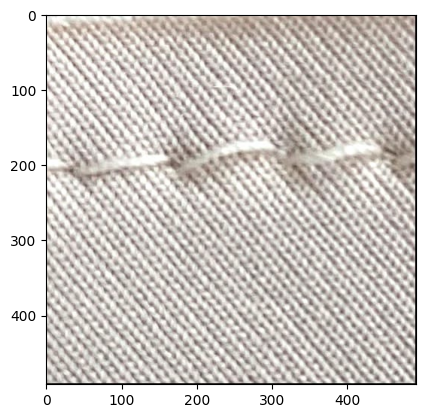

In [229]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

path = 'dataset/validation/straight/straight5.jpg'

image = cv2.imread(path)

# Convert the image to RGB (OpenCV uses BGR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)

The resolution of the image is 492x492 pixels.


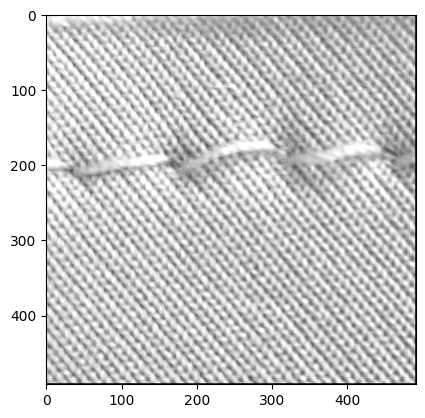

In [230]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread(path, cv2.IMREAD_GRAYSCALE)

if image is None:
    print("Failed to load image")
else:
    height, width = image.shape[:2]
    print(f'The resolution of the image is {width}x{height} pixels.')
    plt.imshow(image, cmap='gray')

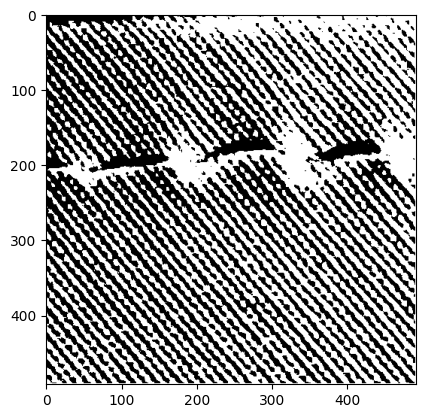

In [231]:
# Apply thresholding
_, image = cv2.threshold(image, 200, 255, cv2.THRESH_BINARY_INV)

plt.imshow(image, cmap='gray')

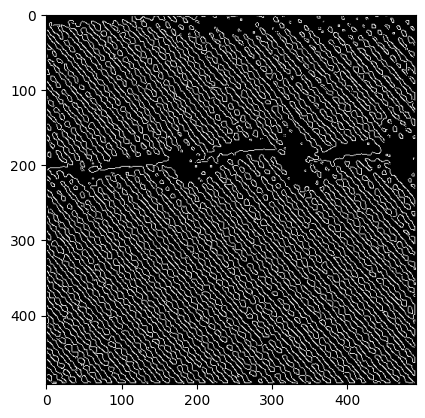

In [232]:
# Detect edges
edges = cv2.Canny(image, 50, 100)
plt.imshow(edges, cmap='gray')

In [233]:
# # Create an empty mask
# mask = np.zeros_like(image)

# # Draw the contours on the mask
# cv2.drawContours(mask, contours, -1, (255), thickness=cv2.FILLED)

# plt.imshow(mask, cmap='gray')

In [234]:
# np.set_printoptions(threshold=np.inf)

# print(image.shape) 
# print(image)

# # The arguments are: image, start_point, end_point, color(BGR), thickness
# image = cv2.line(image, (0, 240), (10, 200), (0, 255, 0), 5)

# plt.imshow(image)

# # The start point is the top-left corner of the image
# start_point = (0, 0)

# # The end point is the bottom-right corner of the image
# end_point = (width - 1, height - 1)

# print(f'The start point is {start_point} and the end point is {end_point}.')

In [235]:
# # Detect corners using the Harris method
# dst = cv2.cornerHarris(image, 3, 5, 0.1)
# plt.imshow(dst, cmap='gray')

In [236]:
# # Apply a filter to extract features. Here, we use Sobel filter for edge detection
# sobelx = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=5)  # Sobel Edge Detection on the X axis
# sobely = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=5)  # Sobel Edge Detection on the Y axis

In [237]:
# # Combine the two edges
# sobel_combined = cv2.bitwise_or(sobelx, sobely)
# plt.imshow('Feature Map', sobel_combined)

In [238]:
# # Apply Gaussian blur to the image
# image = cv2.GaussianBlur(image, (5, 5), 0)

# plt.imshow(image, cmap='gray')

In [239]:
# image = cv2.adaptiveThreshold(image,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,13,5)

# plt.imshow(image, cmap='gray')

In [240]:
# # Edge detection
# image = cv2.Canny(image, 90, 100)

# # # Zero out the part of the image below a certain y-coordinate
# # y_threshold = int(image.shape[0] * 0.5)  # Change this to set the threshold
# # image[y_threshold:, :] = 0

# plt.imshow(image, cmap='gray')

In [241]:
# # Reverse the color of the image
# image = cv2.bitwise_not(image)

# plt.imshow(image, cmap='gray')

In [242]:
# image = cv2.dilate(image, None, iterations=2)
# image = cv2.erode(image, None, iterations=1)

# plt.imshow(image, cmap='gray')

In [243]:
# _, thresh = cv2.threshold(image, 240, 255, cv2.THRESH_BINARY)

# # Count White Lines Of The Images
# contours, _ = cv2.findContours(thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

# # Filter out small contours and count the remaining ones
# lines = [c for c in contours if cv2.contourArea(c) > 100 and cv2.boundingRect(c)[1] > 50]
# number_of_lines = len(lines)

# # Draw the contours on the original image
# image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)

# cv2.drawContours(image, lines, -1, (0, 255, 0), 3)

# plt.imshow(image)
# print(f'Number of lines: {number_of_lines}')